In [1]:
import matplotlib.pyplot as plt

def visualize_encoded_data(encoded_data, sample_index=0):
    encoded_sample = encoded_data[sample_index]

    fig, axes = plt.subplots(1, 4, figsize=(20, 5)) 
    for channel in range(4):
        ax = axes[channel]
        encoded_image = encoded_sample[:, :, channel]
        im = ax.imshow(encoded_image, cmap='viridis')
        fig.colorbar(im, ax=ax)
        ax.set_title(f'Channel {channel+1}')
    plt.show()

torch.Size([100, 8, 8, 4])
torch.Size([100, 8, 8, 4])


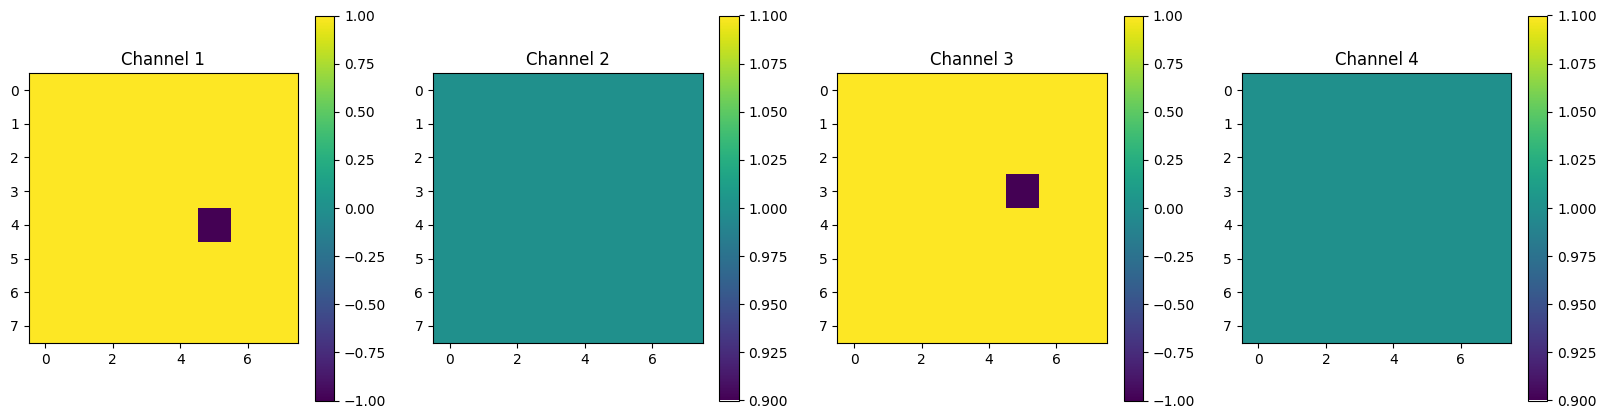

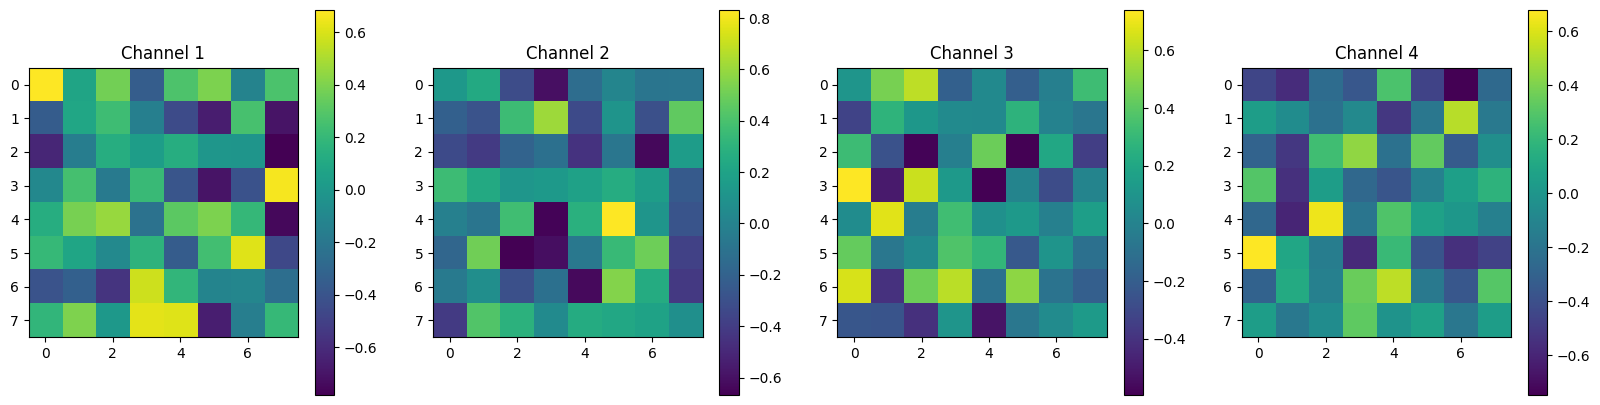

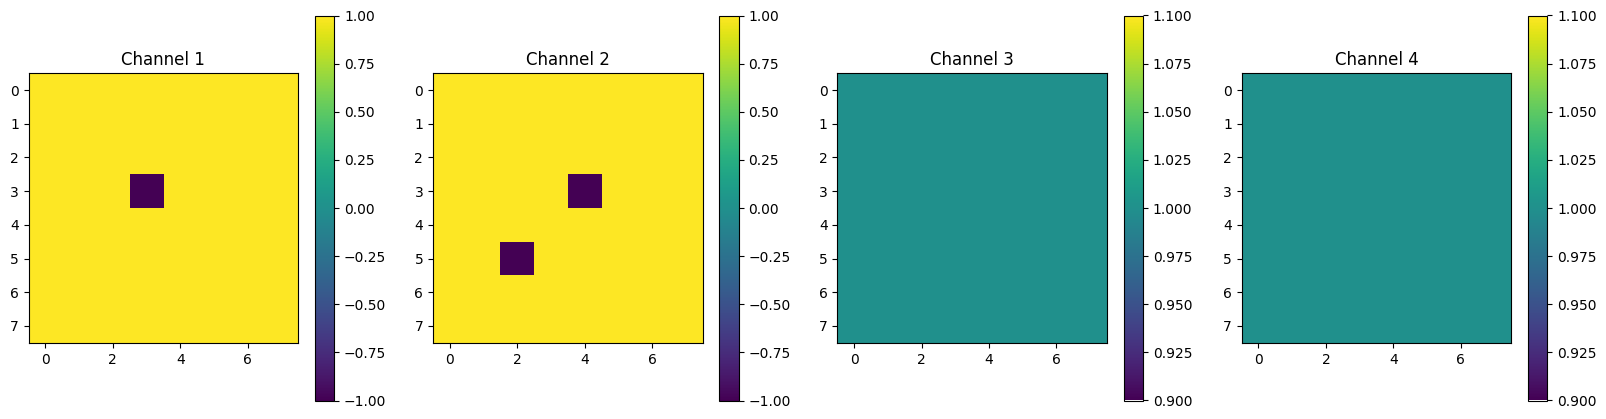

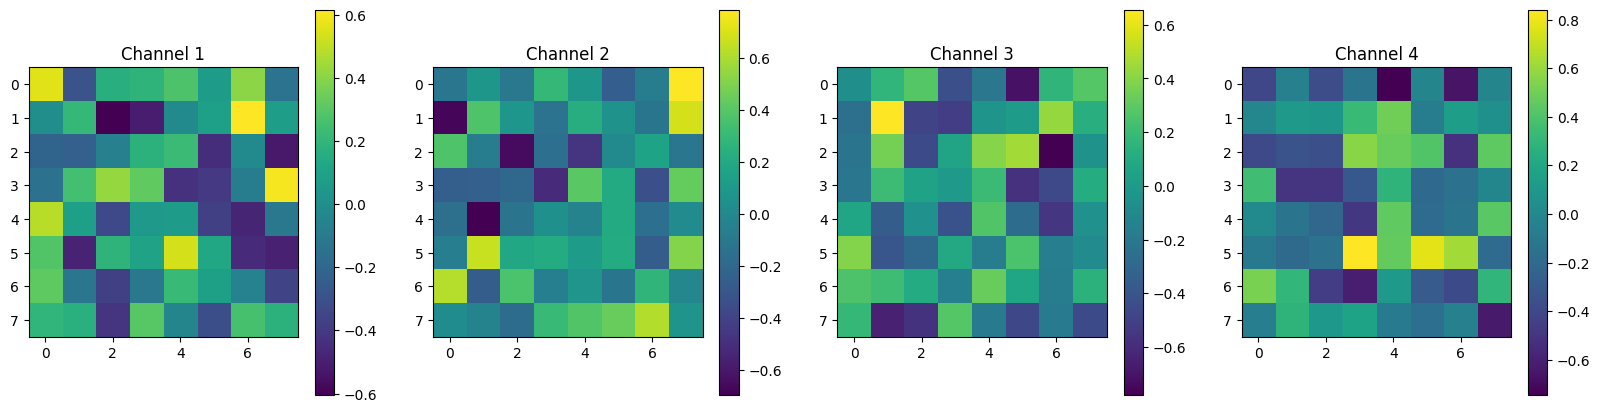

In [5]:
import import_ipynb
import numpy as np
import h5py
import torch
from angle_encoding_script import angle_encoding
from haar_noising import apply_haar_scrambling

filename = "C:/Users/realc/OneDrive/Documents/GSOC/data/QG_train_normalized_16_xl"
data_X = np.array(h5py.File(filename, "r")['X'])

num_samples = 100

encoded_data = [angle_encoding(data_X, sample) for sample in range(num_samples)]
encoded_data = torch.tensor(np.array(encoded_data), dtype=torch.float32)
print(encoded_data.shape)

scrambled_states = apply_haar_scrambling(np.array(encoded_data), num_samples, seed=42)
scrambled_states = torch.tensor(scrambled_states, dtype=torch.float32)
print(scrambled_states.shape)

visualize_encoded_data(encoded_data, sample_index=0)
visualize_encoded_data(scrambled_states, sample_index=0)
visualize_encoded_data(encoded_data, sample_index=1)
visualize_encoded_data(scrambled_states, sample_index=1)